Customer Satisfaction Prediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('customer_support_tickets.csv')
df.shape, df.head()

((8469, 17),
    Ticket ID        Customer Name              Customer Email  Customer Age  \
 0          1        Marisa Obrien  carrollallison@example.com            32   
 1          2         Jessica Rios    clarkeashley@example.com            42   
 2          3  Christopher Robbins   gonzalestracy@example.com            48   
 3          4     Christina Dillon    bradleyolson@example.org            27   
 4          5    Alexander Carroll     bradleymark@example.com            67   
 
   Customer Gender Product Purchased Date of Purchase      Ticket Type  \
 0           Other        GoPro Hero       2021-03-22  Technical issue   
 1          Female       LG Smart TV       2021-05-22  Technical issue   
 2           Other          Dell XPS       2020-07-14  Technical issue   
 3          Female  Microsoft Office       2020-11-13  Billing inquiry   
 4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   
 
              Ticket Subject  \
 0             Product setu

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [6]:
df["Date of Purchase"] = pd.to_datetime(df["Date of Purchase"], errors="coerce")
df["First Response Time"] = pd.to_datetime(df["First Response Time"], errors="coerce")
df["Time to Resolution"] = pd.to_datetime(df["Time to Resolution"], errors="coerce")

In [7]:
df["YearMonth"] = df["Date of Purchase"].dt.to_period("M")
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81+"]
df["Age Group"] = pd.cut(df["Customer Age"], bins=bins, labels=labels, right=False)

In [8]:
df_sat = df[df["Customer Satisfaction Rating"].notna()].copy()
df_sat.shape

(2769, 19)

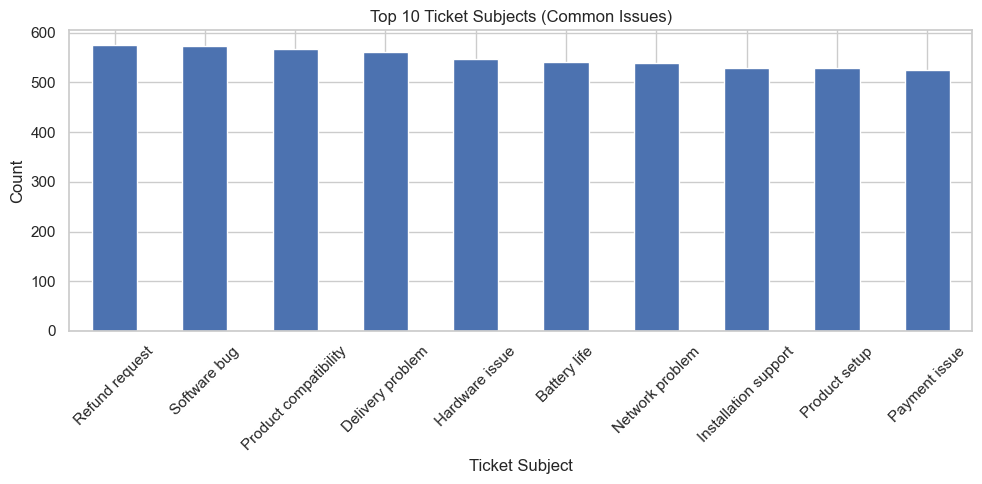

In [9]:
#Top 10 common issues
common_issues = df["Ticket Subject"].value_counts().head(10)
common_issues.plot(kind="bar")
plt.title("Top 10 Ticket Subjects (Common Issues)")
plt.xlabel("Ticket Subject")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

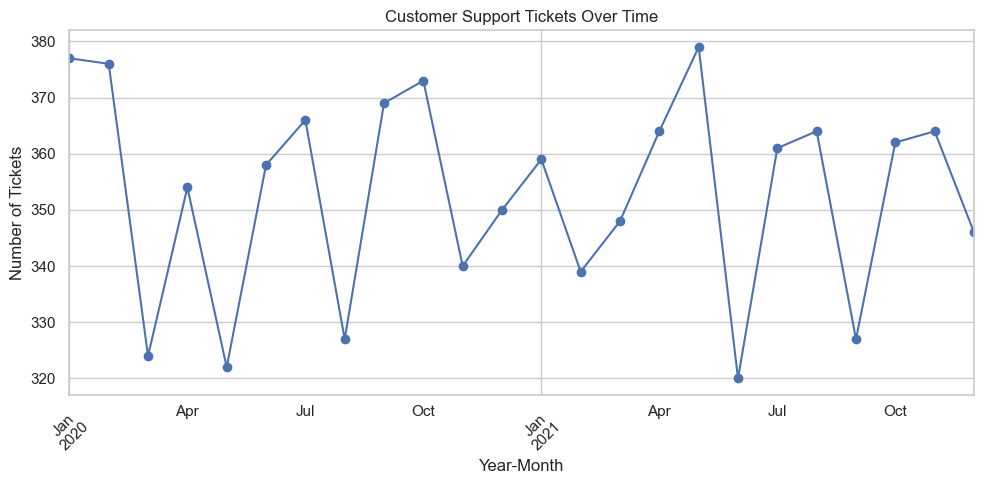

In [10]:
#Tickets over time
ticket_trends = df.groupby("YearMonth").size()
ticket_trends.plot(kind="line", marker="o")
plt.title("Customer Support Tickets Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

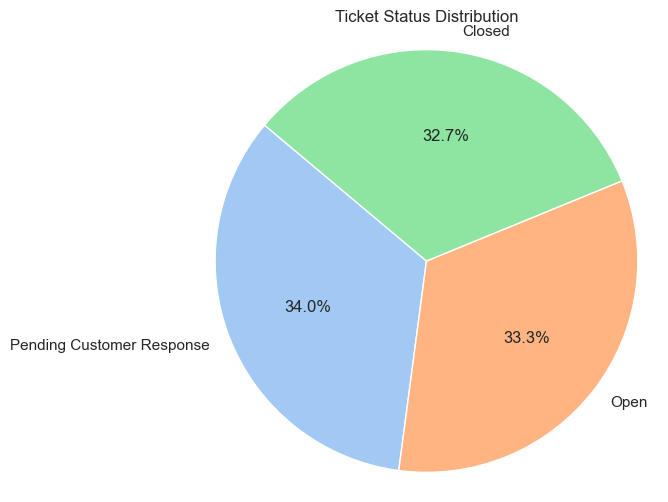

In [11]:
#Ticket Priority
ticket_status_distribution = df["Ticket Status"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(ticket_status_distribution,
        labels=ticket_status_distribution.index,
        autopct="%1.1f%%",
        colors=sns.color_palette("pastel"),
        startangle=140)
plt.title("Ticket Status Distribution")
plt.axis("equal")
plt.show()

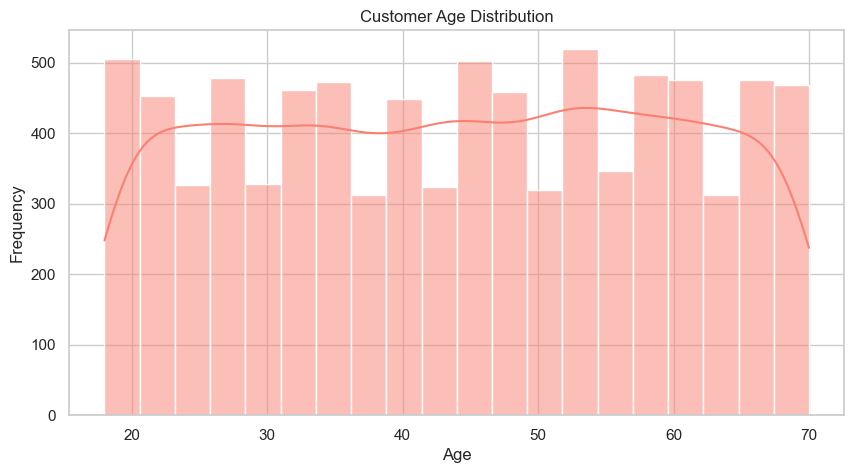

In [12]:
#Customer Age
sns.histplot(df["Customer Age"], bins=20, kde=True, color="salmon")
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

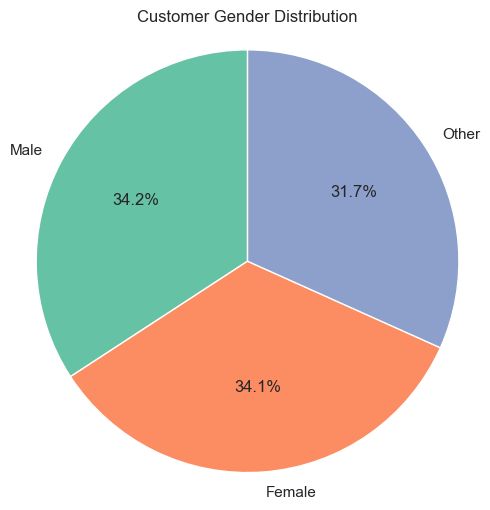

In [13]:
#Gender
gender_counts = df["Customer Gender"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct="%1.1f%%",
        colors=sns.color_palette("Set2"),
        startangle=90)
plt.title("Customer Gender Distribution")
plt.axis("equal")
plt.show()

C:\Users\karth\AppData\Local\Temp\ipykernel_15164\1424057877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_channel_distribution.index,


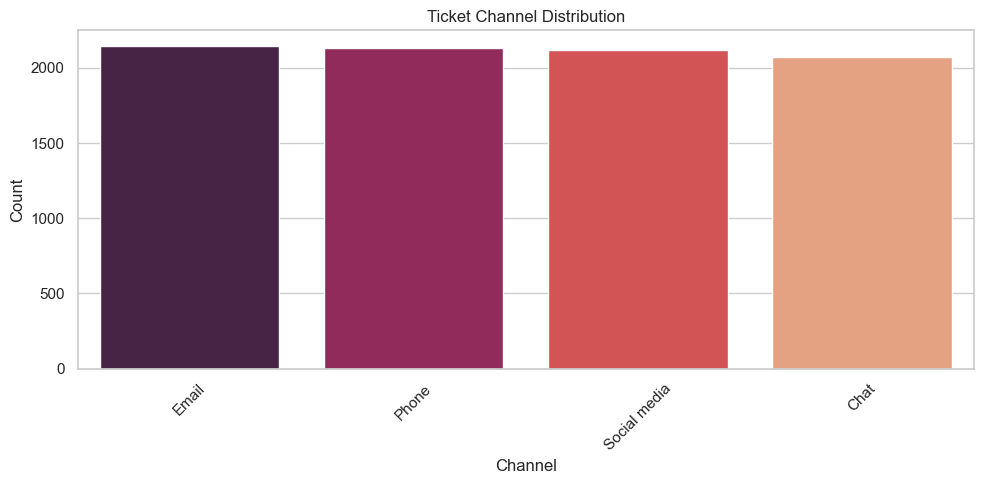

In [14]:
#Ticket Channel
ticket_channel_distribution = df["Ticket Channel"].value_counts()
sns.barplot(x=ticket_channel_distribution.index,
            y=ticket_channel_distribution.values,
            palette="rocket")
plt.title("Ticket Channel Distribution")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

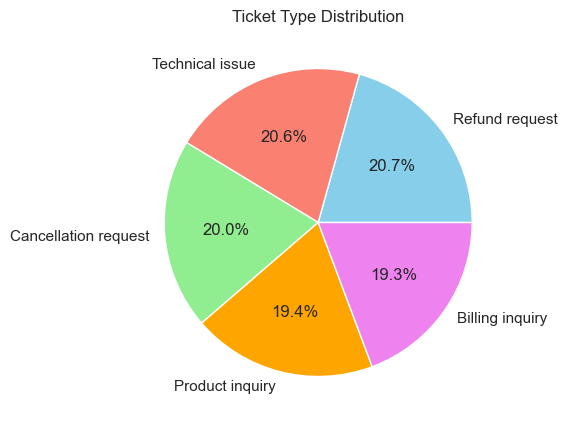

In [15]:
#Ticket Type
ticket_type_distribution = df["Ticket Type"].value_counts()
ticket_type_distribution.plot(kind="pie",
                              autopct="%1.1f%%",
                              colors=["skyblue", "salmon", "lightgreen", "orange", "violet"])
plt.title("Ticket Type Distribution")
plt.ylabel("")
plt.show()

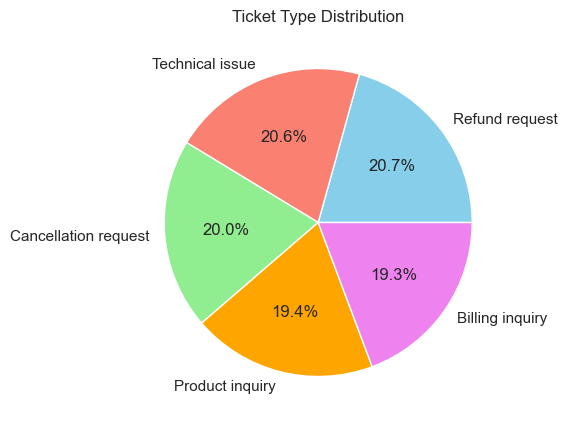

In [16]:
#Ticket Type
ticket_type_distribution = df["Ticket Type"].value_counts()
ticket_type_distribution.plot(kind="pie",
                              autopct="%1.1f%%",
                              colors=["skyblue", "salmon", "lightgreen", "orange", "violet"])
plt.title("Ticket Type Distribution")
plt.ylabel("")
plt.show()

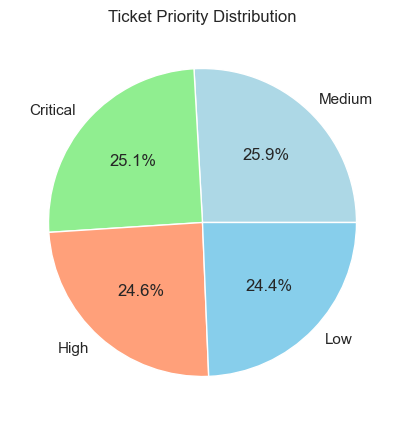

In [17]:
#Ticket Priotiry
priority_distribution = df["Ticket Priority"].value_counts()
priority_distribution.plot(kind="pie",
                           autopct="%1.1f%%",
                           colors=["lightblue", "lightgreen", "lightsalmon", "skyblue"])
plt.title("Ticket Priority Distribution")
plt.ylabel("")
plt.show()

C:\Users\karth\AppData\Local\Temp\ipykernel_15164\3719405695.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tickets_by_age_group = df.groupby("Age Group").size()


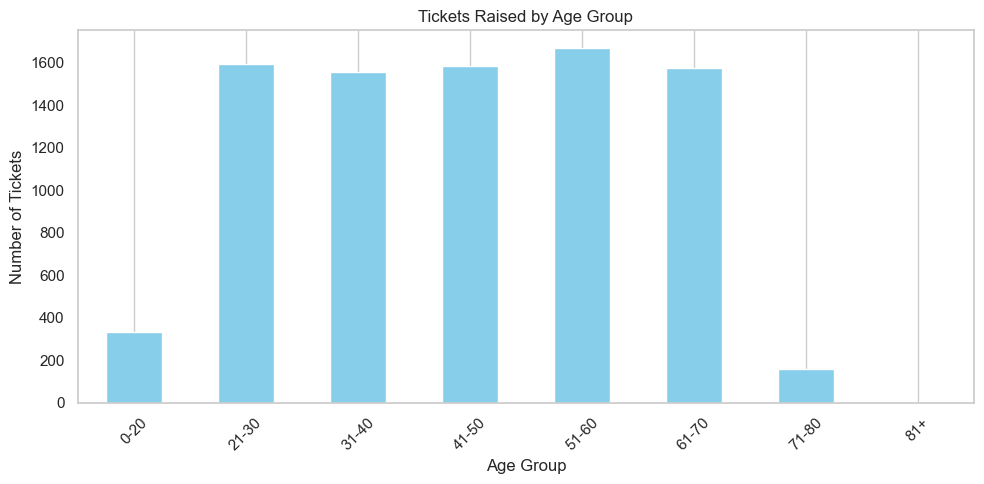

In [19]:
#Tickets by age groups
tickets_by_age_group = df.groupby("Age Group").size()
tickets_by_age_group.plot(kind="bar", color="skyblue")
plt.title("Tickets Raised by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

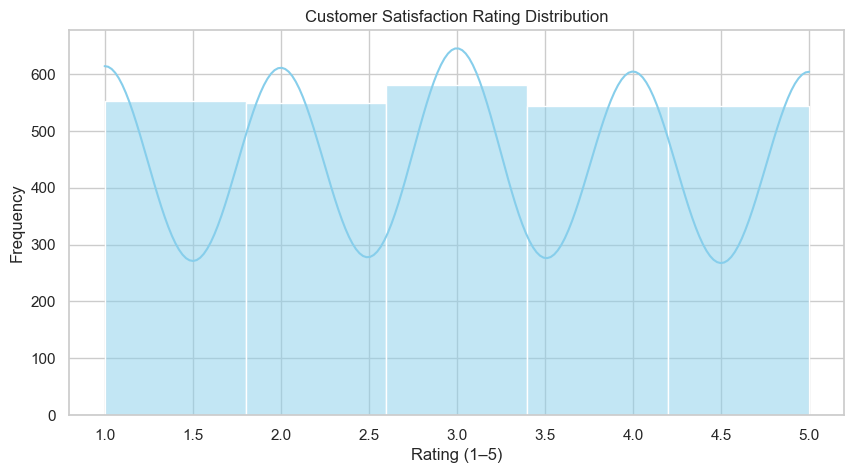

In [20]:
#Satisfaction distribution (only for related ticketS)
sns.histplot(df_sat["Customer Satisfaction Rating"], bins=5, kde=True, color="skyblue")
plt.title("Customer Satisfaction Rating Distribution")
plt.xlabel("Rating (1–5)")
plt.ylabel("Frequency")
plt.show()

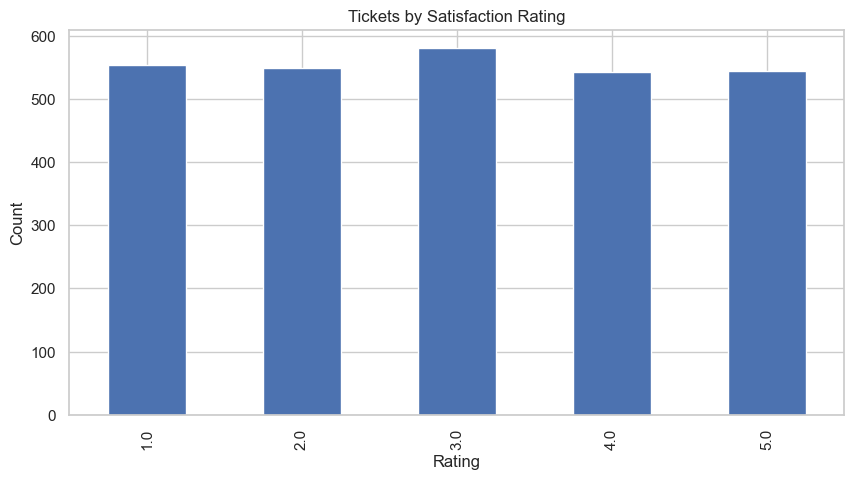

In [21]:
#Segment counts
satisfaction_counts = df_sat["Customer Satisfaction Rating"].value_counts().sort_index()
satisfaction_counts.plot(kind="bar")
plt.title("Tickets by Satisfaction Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

C:\Users\karth\AppData\Local\Temp\ipykernel_15164\1669795915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Customer Gender",


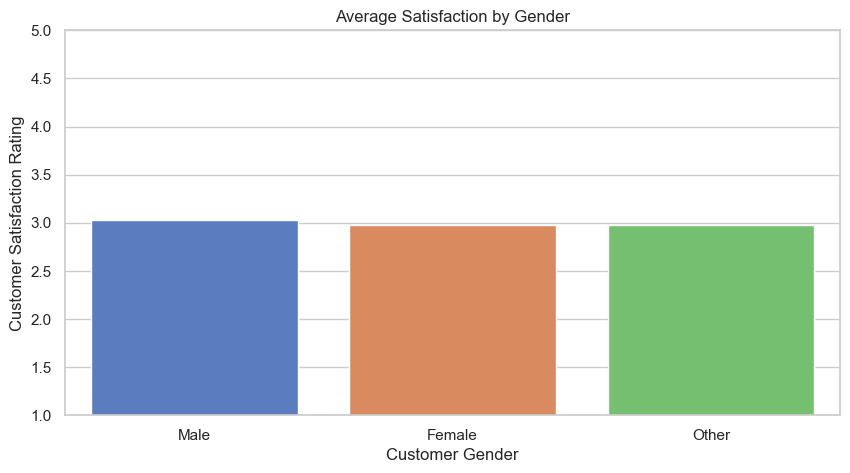

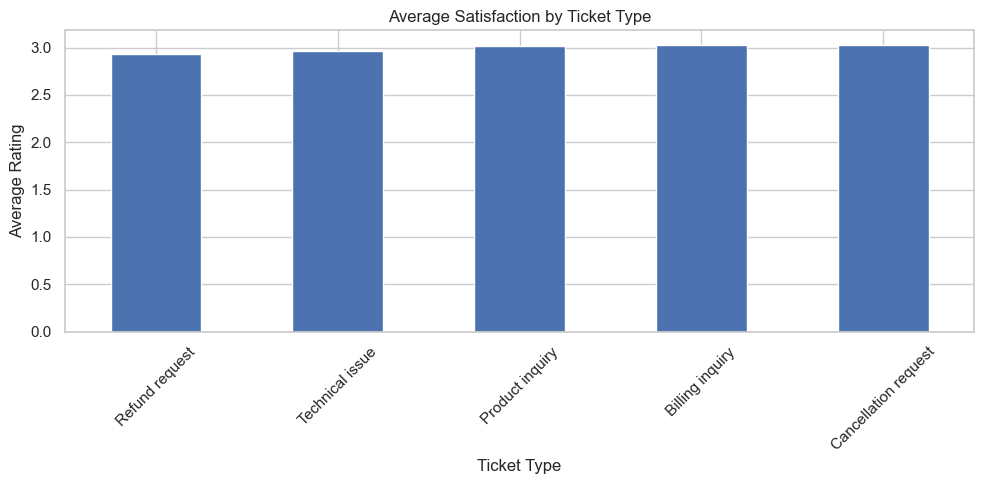

In [22]:
#Average satisfaction by gender and ticket type
avg_sat_gender = df_sat.groupby("Customer Gender")["Customer Satisfaction Rating"].mean().reset_index()
sns.barplot(x="Customer Gender",
            y="Customer Satisfaction Rating",
            data=avg_sat_gender,
            palette="muted",
            order=["Male", "Female", "Other"])
plt.title("Average Satisfaction by Gender")
plt.ylim(1, 5)
plt.show()

avg_sat_type = df_sat.groupby("Ticket Type")["Customer Satisfaction Rating"].mean().sort_values()
avg_sat_type.plot(kind="bar")
plt.title("Average Satisfaction by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

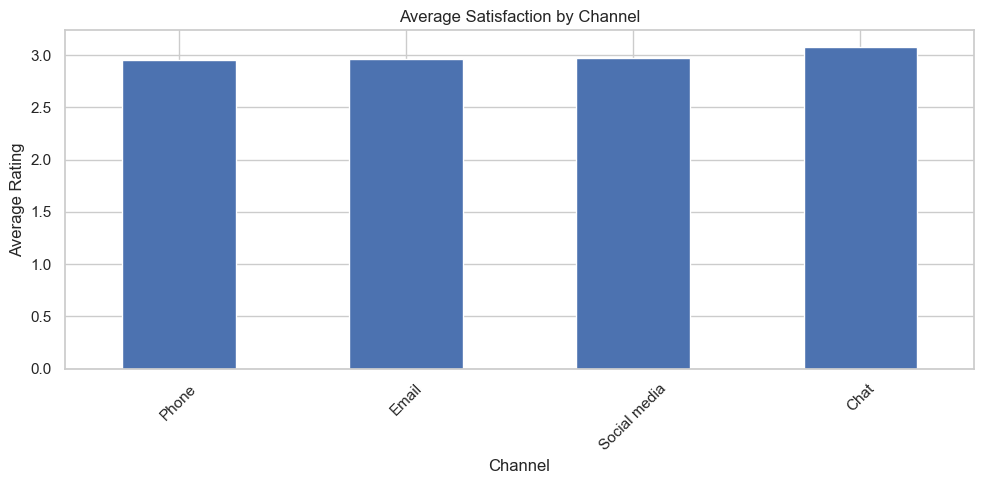

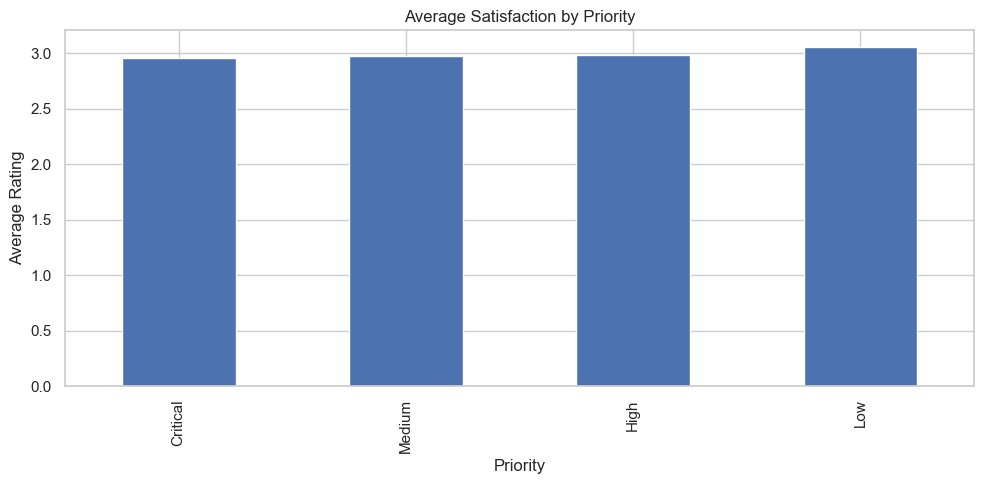

In [23]:
#Average Staisfaction Channel & by priority
avg_sat_channel = df_sat.groupby("Ticket Channel")["Customer Satisfaction Rating"].mean().sort_values()
avg_sat_channel.plot(kind="bar")
plt.title("Average Satisfaction by Channel")
plt.xlabel("Channel")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

avg_sat_priority = df_sat.groupby("Ticket Priority")["Customer Satisfaction Rating"].mean().sort_values()
avg_sat_priority.plot(kind="bar")
plt.title("Average Satisfaction by Priority")
plt.xlabel("Priority")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

C:\Users\karth\AppData\Local\Temp\ipykernel_15164\1215635710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_counts.index,


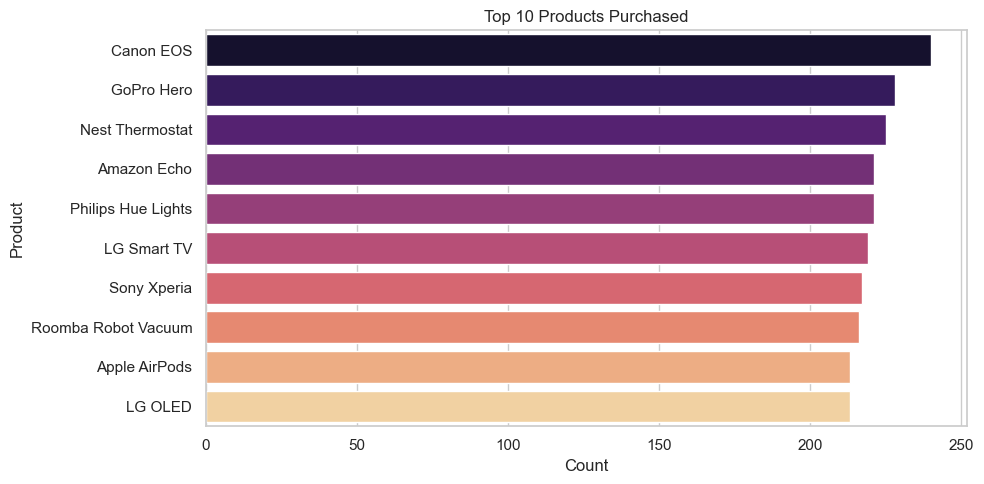

In [24]:
#Top 10 products purchased
product_counts = df["Product Purchased"].value_counts().head(10)
sns.barplot(y=product_counts.index,
            x=product_counts.values,
            palette="magma")
plt.title("Top 10 Products Purchased")
plt.xlabel("Count")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

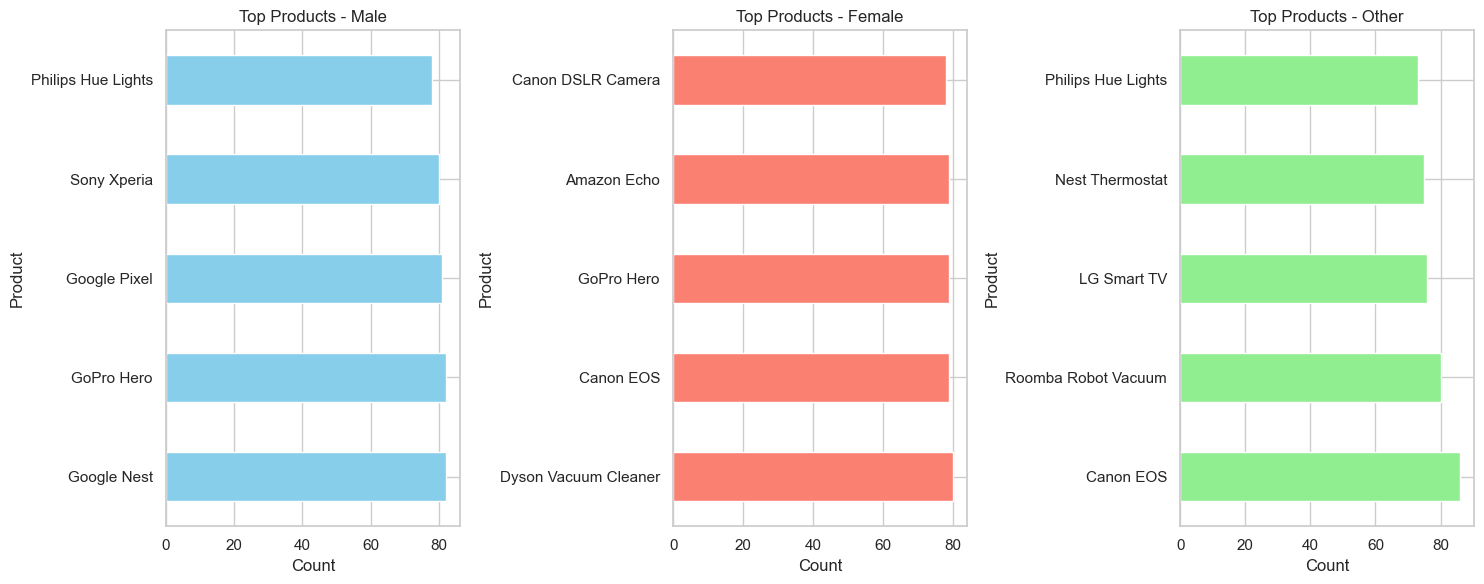

In [25]:
#Top items by gender
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
top_items_male = df[df["Customer Gender"] == "Male"]["Product Purchased"].value_counts().head(5)
top_items_male.plot(kind="barh", color="skyblue")
plt.title("Top Products - Male")
plt.xlabel("Count")
plt.ylabel("Product")

plt.subplot(1, 3, 2)
top_items_female = df[df["Customer Gender"] == "Female"]["Product Purchased"].value_counts().head(5)
top_items_female.plot(kind="barh", color="salmon")
plt.title("Top Products - Female")
plt.xlabel("Count")
plt.ylabel("Product")

plt.subplot(1, 3, 3)
top_items_other = df[df["Customer Gender"] == "Other"]["Product Purchased"].value_counts().head(5)
top_items_other.plot(kind="barh", color="lightgreen")
plt.title("Top Products - Other")
plt.xlabel("Count")
plt.ylabel("Product")

plt.tight_layout()
plt.show()

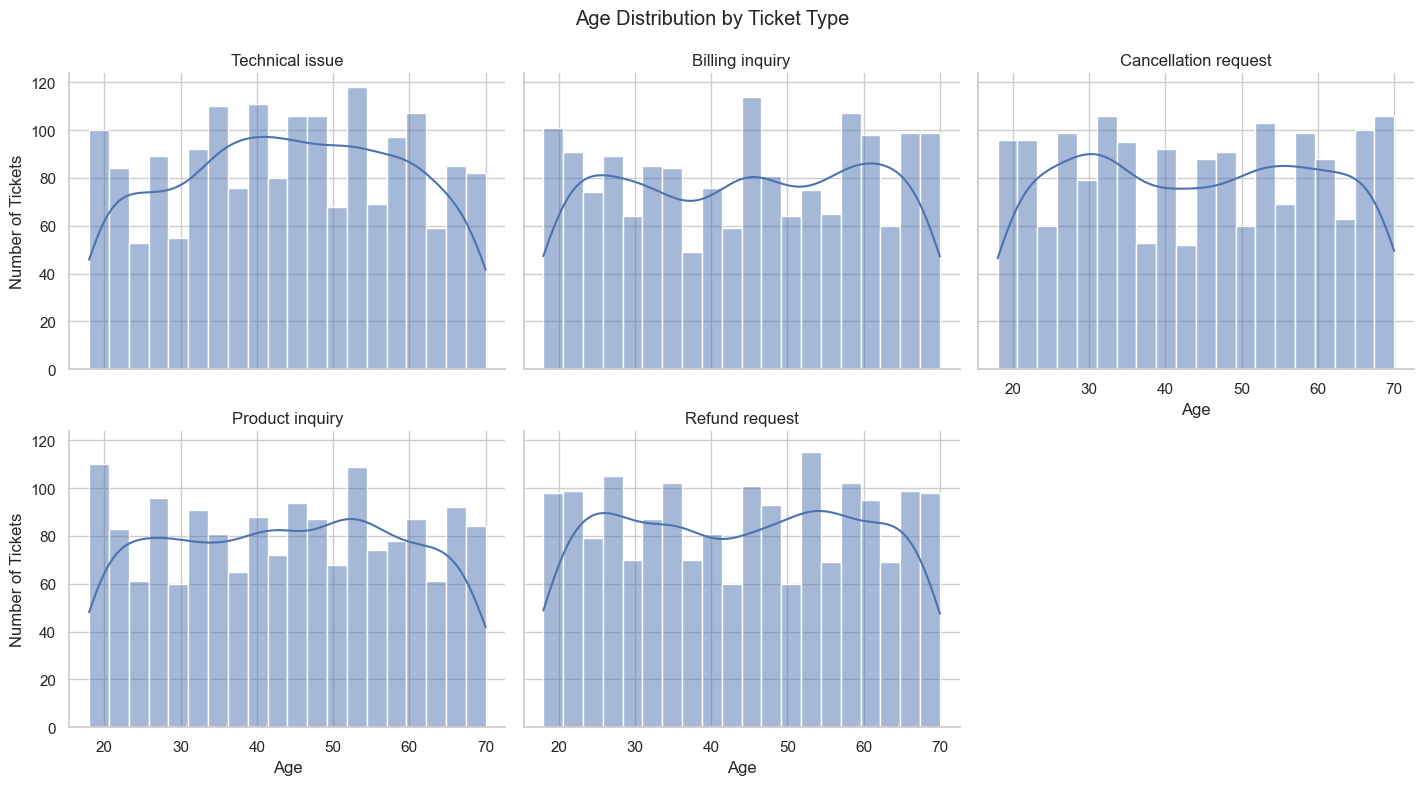

In [26]:
#Ticket type by age distribution
df.replace([np.inf, -np.inf], np.nan, inplace=True)

g = sns.FacetGrid(df, col="Ticket Type", col_wrap=3, height=4, aspect=1.2)
g.map(sns.histplot, "Customer Age", bins=20, kde=True)
g.set_titles("{col_name}")
g.set_axis_labels("Age", "Number of Tickets")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Age Distribution by Ticket Type")
plt.show()